In [1]:
import matplotlib
import matplotlib.pyplot as plt
import pickle
import numpy as np

In [9]:
def moving_average(x, n=100):
    cumsum = np.cumsum(np.insert(x, 0, 0))
    return (cumsum[n:] - cumsum[:-n]) / float(n)

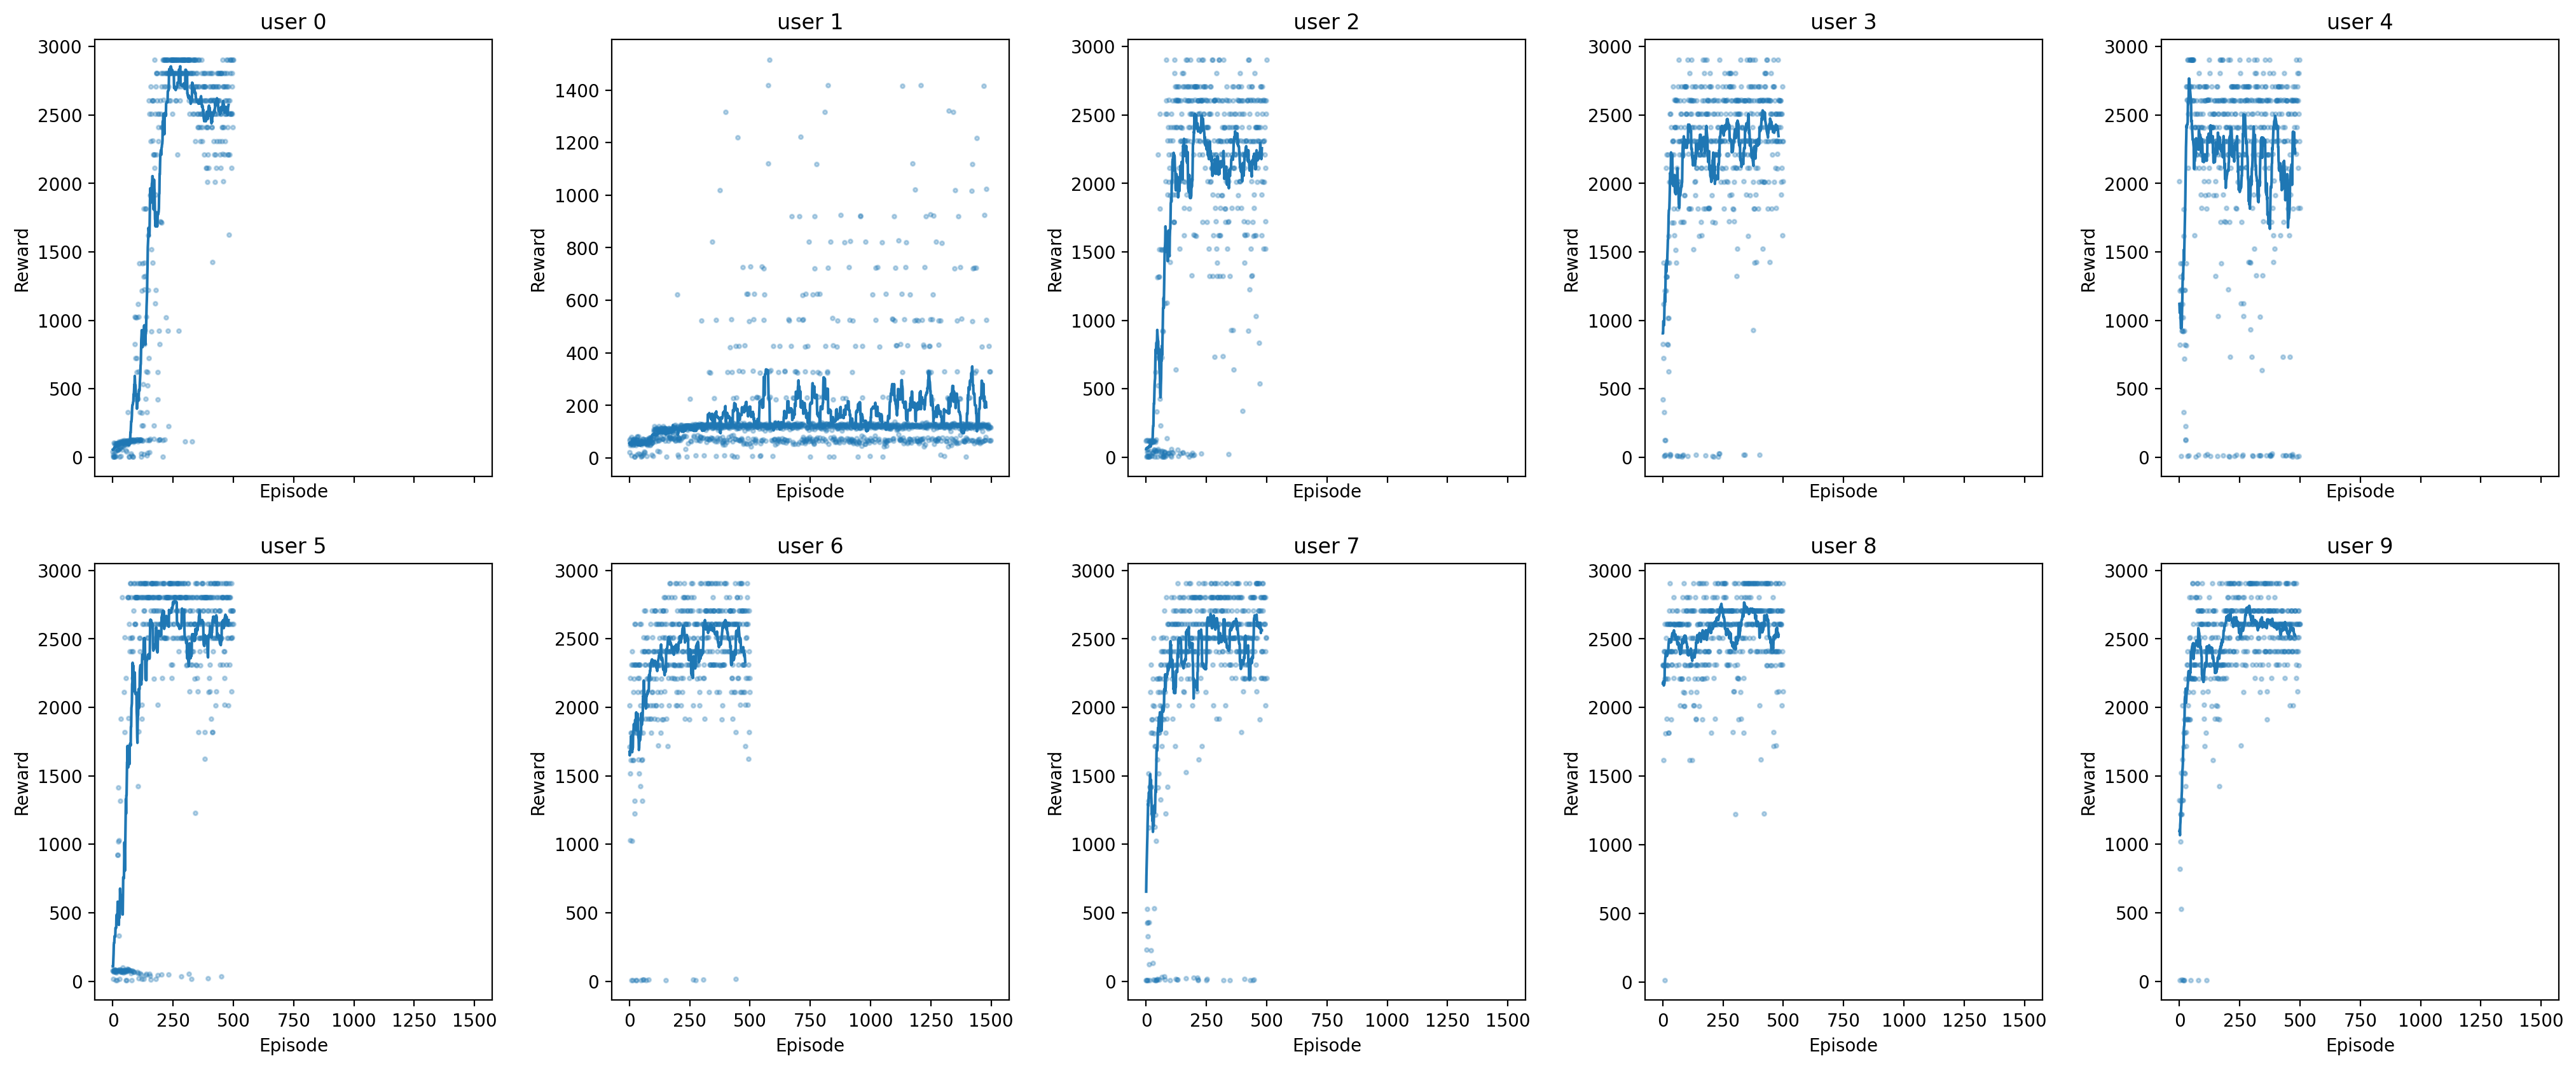

In [176]:
fig, ax_set = plt.subplots(2, 5, dpi=200, sharex=True, figsize=(25, 10))
pg_rewards_list = []
with open(f'data/CB_rewards.pickle', 'rb') as pk:
    CB_rewards = pickle.load(pk)

for i in range(10):
    with open(f'data/pg_total_rewards_{i}.pickle', 'rb') as pk:
        pg_rewards = pickle.load(pk)
    ax = ax_set[i//5, i%5]
    # ax.axhline(y = CB_rewards[i], color = 'gray', linestyle = ':', alpha=0.2)
    ax.scatter(np.arange(len(pg_rewards)), pg_rewards, label='episodes', alpha=0.3, s=5)
    pg_rewards_list.append(pg_rewards)
    ax.plot(moving_average(pg_rewards, 20), label=f'average')
    ax
    ax.set_title(f'user {i}')
    # ax.set_title(f'Policy Gradient')
    ax.set_xlabel('Episode')
    ax.set_ylabel('Reward')
    
    # if i != 5:
    #     ax.set_ylim([-100,3100])
# fig.supxlabel('episodes')
# fig.supylabel('rewards')
# plt.title('Rewards under MCPG')
plt.subplots_adjust(wspace=0.3, hspace=0.2)
plt.show()

In [178]:
with open('pg_origin_rewards.pickle', 'wb') as pk:
    pickle.dump(pg_rewards_list, pk, protocol=pickle.HIGHEST_PROTOCOL)

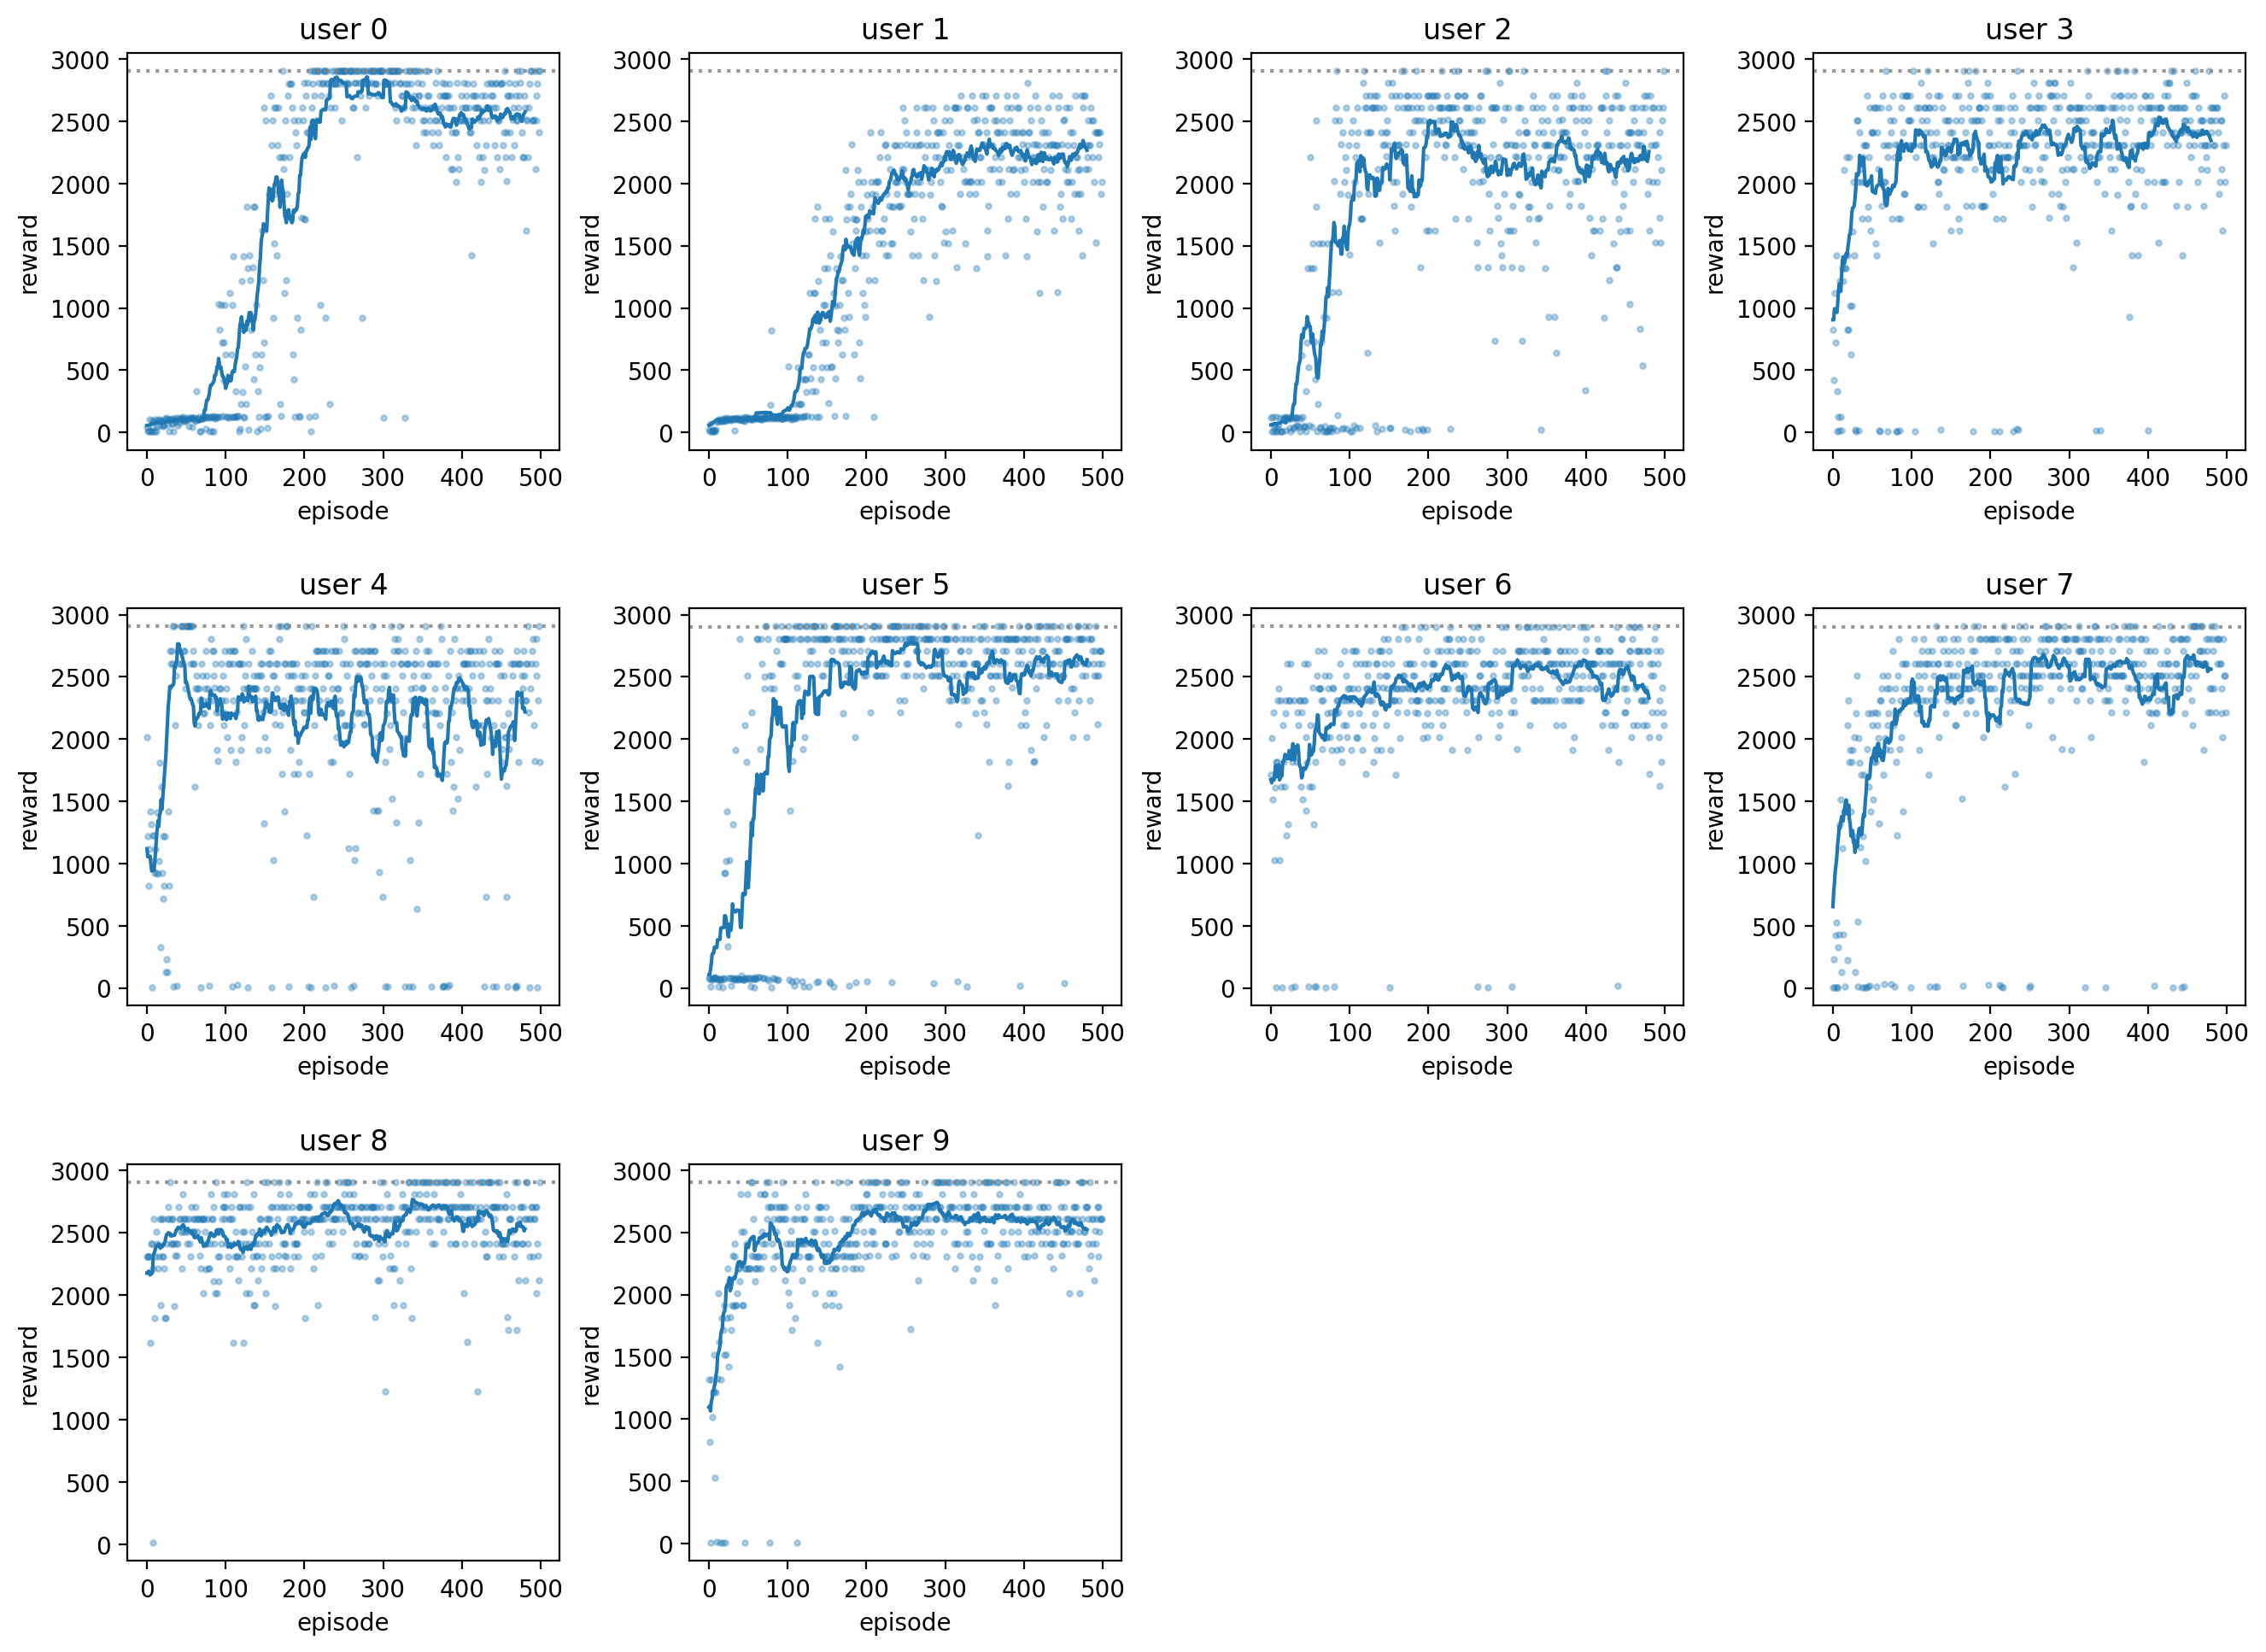

In [183]:
fig = plt.figure(dpi=200, figsize=(16, 16))
columns = 4
rows = 4

with open(f'data/CB_rewards.pickle', 'rb') as pk:
    CB_rewards = pickle.load(pk)

with open(f'pg_origin_rewards.pickle', 'rb') as pk:
    pg_rewards_list = pickle.load(pk)

for i in range(1,11):
    fig.add_subplot(rows, columns, i)
    pg_rewards = pg_rewards_list[i-1]
    plt.scatter(np.arange(len(pg_rewards)), pg_rewards, label='episodes', alpha=0.3, s=5)
    plt.axhline(y = CB_rewards[i-1], color = 'gray', linestyle = ':', alpha=0.8)
    plt.plot(moving_average(pg_rewards, 20), label=f'average')
    plt.xlabel('episode')
    plt.ylabel('reward')
    plt.title(f'user {i-1}')
    
    # pg_rewards = pg_rewards_list[i]
    # ax = ax_set[i//4, i%4]
    # ax.axhline(y = CB_rewards[i], color = 'gray', linestyle = ':', alpha=0.8)
    # ax.scatter(np.arange(len(pg_rewards)), pg_rewards, label='episodes', alpha=0.3, s=5)
    # pg_rewards_list.append(pg_rewards)
    # ax.plot(moving_average(pg_rewards, 20), label=f'average')
    # ax.set_title(f'user {i}')
    # # ax.set_title(f'Policy Gradient')
    # ax.set_xlabel('Episode')
    # ax.set_ylabel('Reward')
    
    # if i != 5:
    #     ax.set_ylim([-100,3100])
# fig.supxlabel('episodes')
# fig.supylabel('rewards')
# plt.title('Rewards under MCPG')
plt.subplots_adjust(wspace=0.3, hspace=0.4)
plt.show()

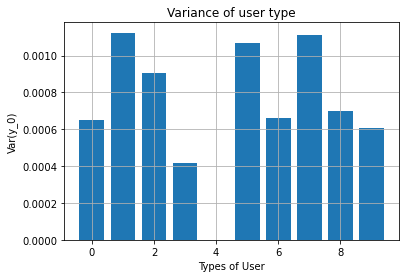

In [130]:
with open('data/km_model.pickle', 'rb') as pk:
    kmeans = pickle.load(pk)
    
Y = np.zeros(len(kmeans.cluster_centers_))
for i,cen in enumerate(kmeans.cluster_centers_):
    # y = np.ones(len(cen))
    # Y[i] = np.dot(y, cen)/(np.linalg.norm(y)*np.linalg.norm(cen))
    Y[i] = np.var(cen)
X = np.arange(len(kmeans.cluster_centers_))
plt.bar(X, Y)
plt.xlabel('Types of User')
plt.ylabel('Var(y_0)')
plt.title('Variance of user type')
plt.grid(True)
plt.show()
    